##  Apply Filters to an Image (kernel convolution)
(c) Numerical Factory (2025)

A **filter** or **kernel** $F$ is a small matrix (of size $k\times k$) that we will use to change the present color value of a pixel according to the respective $k\times k$ neighbours. Image must be converted to double before apply the filter.

<div>
<img src="https://numfactory.upc.edu/web/images/kernel_convolution.jpg" width="400"/>
</div>


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


def apply_kernel_nxn(img, F):
    """
    Apply a nxn kernel to a 2D grayscale image without padding, ignoring borders.
    Works for any odd-sized square kernel.
    """
    img = img / 255.0
    m, n = img.shape
    k = F.shape[0]  # kernel size (assume square and odd)
    assert F.shape[0] == F.shape[1], "Kernel must be square"
    assert k % 2 == 1, "Kernel size must be odd"
    out = img.copy()
    offset = k // 2
    for i in range(offset, m - offset):
        for j in range(offset, n - offset):
            patch = img[i - offset:i + offset + 1, j - offset:j + offset + 1]
            out[i, j] = np.sum(F * patch)
    return out


## Gray images 
If your image is an RGB one, you have to convert from color to gray image (use the mean of color channels)

In [ ]:

#  Load and show image

imGray = plt.imread('coins.jpg')   # grayscale image
# If the file is RGB, convert to grayscale
if imGray.ndim == 3:
    imGray = imGray.mean(axis=2)

plt.figure()
plt.imshow(imGray, cmap='gray')
plt.axis('off')
plt.title('imGray');


In [ ]:

# Copy for later use
imGrayOrig = imGray.copy()

# Sizes
m, n = imGrayOrig.shape

# %% Mean filter (kernel convolution)

F = np.ones((5, 5))/25.0
newGray = apply_kernel_nxn(imGrayOrig, F)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(imGrayOrig,cmap=plt.get_cmap('gray'));
plt.axis('off'); plt.title('Original');

plt.subplot(1,2,2)
plt.imshow(newGray,cmap=plt.get_cmap('gray'));
plt.axis('off'); plt.title('Blurred');


In [ ]:

# Special filters: vertical contours
# Alternative: 

Fv = np.array([[ 1, 0,-1],
               [ 1, 0,-1],
               [ 1, 0,-1]], dtype=np.float64)/2.0

newGrayV = apply_kernel_nxn(imGrayOrig, Fv)
newGrayV = np.abs(newGrayV) # take absolute value to see contours in both directions

plt.figure()
plt.subplot(1,2,1)
plt.imshow(imGrayOrig,cmap=plt.get_cmap('gray'));
plt.axis('off'); plt.title('Original');

plt.subplot(1,2,2)
plt.imshow(newGrayV, cmap=plt.get_cmap('gray'));
plt.axis('off'); plt.title('Vertical contours');


In [ ]:

# %% Special filters: horizontal contours
Fh = np.array([[ 1, 1, 1],
               [ 0, 0, 0],
               [-1,-1,-1]], dtype=np.float64)

newGrayH = apply_kernel_nxn(imGrayOrig, Fh)
newGrayH = np.abs(newGrayH) # take absolute value to see contours in both directions

plt.figure()
plt.subplot(1,2,1)
plt.imshow(imGrayOrig,cmap=plt.get_cmap('gray'));
plt.axis('off'); plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(newGrayH,cmap=plt.get_cmap('gray'));
plt.axis('off'); plt.title('Horizontal contours')


In [ ]:

# Contours in both directions
newContour = newGrayV + newGrayH
plt.figure()
plt.imshow(newContour, cmap='gray')
plt.axis('off'); plt.title('All contours together')


## Other Filters: Emboss

Apply to the *coins* image,  the **Emboss** filter defined by the matrix: 

$ F_e = \begin{pmatrix} 2 & 0 & 0  \\ 0 & -1 & 0  \\ 0 & 0 & -1  \end{pmatrix} $

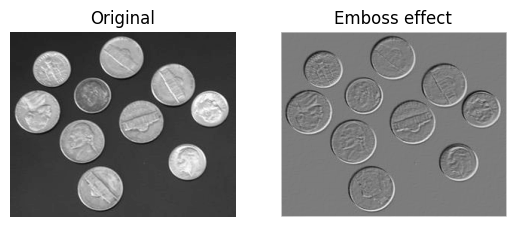

In [ ]:
# Other Filters: Emboss
# .............


## Exercise 1:

Filter the **sports.jpg** image using the **Emboss filter**

<div>
<img src="https://numfactory.upc.edu/web/images/sports.jpg" width="400"/>
</div>

## Exercise 2:

Filter the **sports.jpg** image using a **Gaussian filter**